In [4]:
library(pacman)
p_load(tidyverse, data.table)
setwd("/mnt/projects/users/sgok603/pd_mr/git_deposits/scripts/")


Comment: 
Methods: Although briefly described in the methods, 
please provide further details of the data harmonization process 
and QC steps for the two sample MR analyses as supplementary data 
so that all analyses can be replicated. Did the authors adhere to any 
published guidelines for data harmonization (e.g., Fortier et al., 2016). 
Can the authors comment on the quality of the harmonization process? 
Is an estimate provided? What is the correlation coefficient for the 
datasets before and after harmonization regarding the effect allele frequency?


## aorta (full dataset)

[1] "Correlation before harmonization: r = 0.433"
[1] "Correlation after harmonization: r = 0.459"


[1] 0.1 0.5

[1] 0.0038 0.9675

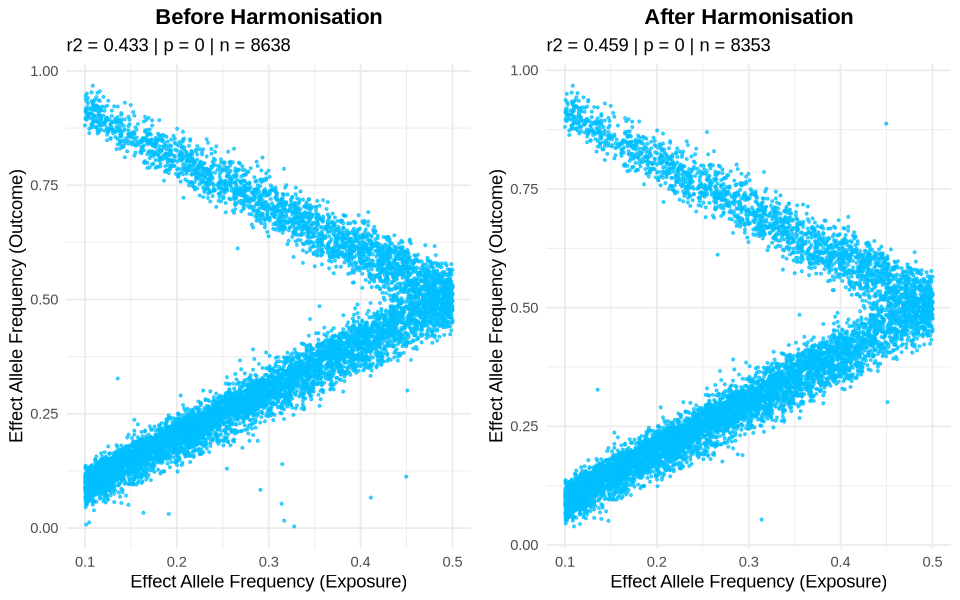

In [14]:
aorta_exp_dat <- read_tsv("../../analysis/artery_aorta/artery_aorta_grn_ld_clumped.txt", show_col_types = F)
aorta_out_dat <- read_tsv("../data/artery_aorta/outcome_df.txt", show_col_types = F)
harm_dat <- read_tsv("../data/artery_aorta/harmonised_eo_df.txt", show_col_types = F)

aorta_before_har <- inner_join(aorta_exp_dat %>%  
                         filter(mr_keep.exposure == TRUE) %>% 
                         dplyr::select(SNP, eaf.exposure) %>%
                         distinct(), 
                        aorta_out_dat %>% 
                         filter(mr_keep.outcome == TRUE) %>% 
                         dplyr::select(SNP, eaf.outcome) %>% 
                         distinct(),
                        by = "SNP")
aorta_after_har <- harm_dat %>% 
    dplyr::select(SNP, eaf.exposure, eaf.outcome) %>% 
    distinct()

# Compute correlation coefficients
cor_before <- cor.test(aorta_before_har$eaf.exposure, aorta_before_har$eaf.outcome, method = "pearson")
cor_after <- cor.test(aorta_after_har$eaf.exposure, aorta_after_har$eaf.outcome, method = "pearson")

print(paste("Correlation before harmonization: r =", round(cor_before$estimate, 3)))
print(paste("Correlation after harmonization: r =", round(cor_after$estimate, 3)))

plot_correlation <- function(data, cor_result, title) {
  ggplot(data, aes(x = eaf.exposure, y = eaf.outcome)) +
    geom_point(color = "deepskyblue", alpha = 0.7, size = 0.5) +  # Scatter plot points
    labs(
      title = title,
      subtitle = paste("r2 =", round(cor_result$estimate, 3), "| p =", signif(cor_result$p.value, 3), "| n =", unique(length(data$SNP))),
      x = "Effect Allele Frequency (Exposure)",
      y = "Effect Allele Frequency (Outcome)"
    ) +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5, face = "bold"))
}

# Generate and display plots
p1 <- plot_correlation(aorta_before_har, cor_before, "Before Harmonisation")
p2 <- plot_correlation(aorta_after_har, cor_after, "After Harmonisation")

# Display plots side by side
# pdf("../plots/harmonisation_qc/aorta_before_after_harmonisation_pearson.pdf", width = 8, height = 5)
options(repr.plot.width = 8, repr.plot.height = 5)
library(gridExtra)
grid.arrange(p1, p2, ncol = 2)
# dev.off()

range(aorta_exp_dat$eaf.exposure)
range(aorta_out_dat$eaf.outcome)

### coronary (full dataset)

[1] "Correlation before harmonization: r = 0.461"
[1] "Correlation after harmonization: r = 0.484"


[1] 0.1004902 0.5000000

[1] 0.0078 0.9504

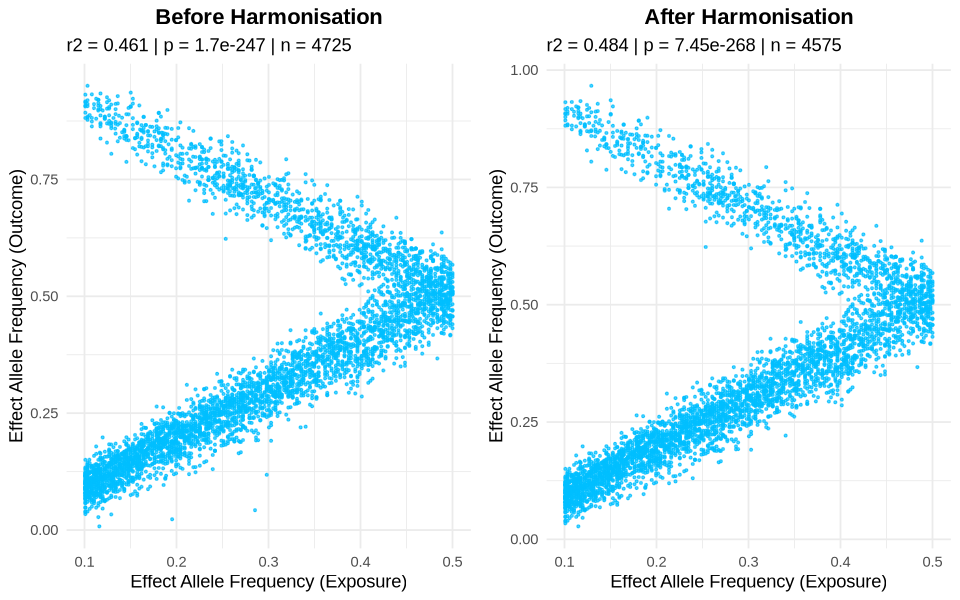

In [15]:
coronary_exp_dat <- read_tsv("../../analysis//artery_coronary/artery_coronary_grn_ld_clumped.txt", show_col_types = F)
coronary_out_dat <- read_tsv("../data/artery_coronary/outcome_df.txt", show_col_types = F)
harm_dat <- read_tsv("../data/artery_coronary/harmonised_eo_df.txt", show_col_types = F)

coronary_before_har <- inner_join(coronary_exp_dat %>%  
                         filter(mr_keep.exposure == TRUE) %>% 
                         dplyr::select(SNP, eaf.exposure) %>%
                         distinct(), 
                        coronary_out_dat %>% 
                         filter(mr_keep.outcome == TRUE) %>% 
                         dplyr::select(SNP, eaf.outcome) %>% 
                         distinct(),
                        by = "SNP")
coronary_after_har <- harm_dat %>% 
    dplyr::select(SNP, eaf.exposure, eaf.outcome) %>% 
    distinct()

# Compute correlation coefficients
cor_before <- cor.test(coronary_before_har$eaf.exposure, coronary_before_har$eaf.outcome, method = "pearson")
cor_after <- cor.test(coronary_after_har$eaf.exposure, coronary_after_har$eaf.outcome, method = "pearson")

print(paste("Correlation before harmonization: r =", round(cor_before$estimate, 3)))
print(paste("Correlation after harmonization: r =", round(cor_after$estimate, 3)))

plot_correlation <- function(data, cor_result, title) {
  ggplot(data, aes(x = eaf.exposure, y = eaf.outcome)) +
    geom_point(color = "deepskyblue", alpha = 0.7, size = 0.5) +  # Scatter plot points
    labs(
      title = title,
      subtitle = paste("r2 =", round(cor_result$estimate, 3), "| p =", signif(cor_result$p.value, 3), "| n =", unique(length(data$SNP))),
      x = "Effect Allele Frequency (Exposure)",
      y = "Effect Allele Frequency (Outcome)"
    ) +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5, face = "bold"))
}

# Generate and display plots
p1 <- plot_correlation(coronary_before_har, cor_before, "Before Harmonisation")
p2 <- plot_correlation(coronary_after_har, cor_after, "After Harmonisation")

# Display plots side by side
# pdf("../plots/harmonisation_qc/coronary_before_after_harmonisation_pearson.pdf", width = 8, height = 5)
options(repr.plot.width = 8, repr.plot.height = 5)
library(gridExtra)
grid.arrange(p1, p2, ncol = 2)
# dev.off()

range(coronary_exp_dat$eaf.exposure)
range(coronary_out_dat$eaf.outcome)

### brain cortex (full dataset)

[1] "Correlation before harmonization: r = 0.517"
[1] "Correlation after harmonization: r = 0.546"


[1] 0.05121951 0.50000000

[1] 0.0054 0.9864

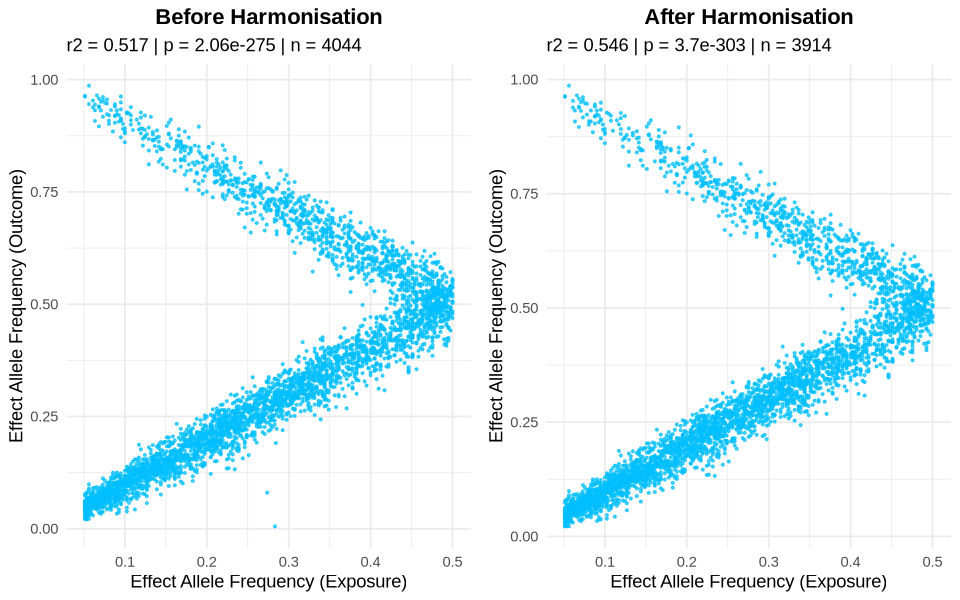

In [16]:
adult_cortex_exp_dat <- read_tsv("../../analysis/adult_cortex/adult_cortex_grn_ld_clumped.txt", show_col_types = F)
adult_cortex_out_dat <- read_tsv("../data/adult_cortex/outcome_df.txt", show_col_types = F)
harm_dat <- read_tsv("../data/adult_cortex/harmonised_eo_df.txt", show_col_types = F)

adult_cortex_before_har <- inner_join(adult_cortex_exp_dat %>%  
                         filter(mr_keep.exposure == TRUE) %>% 
                         dplyr::select(SNP, eaf.exposure) %>%
                         distinct(), 
                        adult_cortex_out_dat %>% 
                         filter(mr_keep.outcome == TRUE) %>% 
                         dplyr::select(SNP, eaf.outcome) %>% 
                         distinct(),
                        by = "SNP")
adult_cortex_after_har <- harm_dat %>% 
    dplyr::select(SNP, eaf.exposure, eaf.outcome) %>% 
    distinct()

# Compute correlation coefficients
cor_before <- cor.test(adult_cortex_before_har$eaf.exposure, adult_cortex_before_har$eaf.outcome, method = "pearson")
cor_after <- cor.test(adult_cortex_after_har$eaf.exposure, adult_cortex_after_har$eaf.outcome, method = "pearson")

print(paste("Correlation before harmonization: r =", round(cor_before$estimate, 3)))
print(paste("Correlation after harmonization: r =", round(cor_after$estimate, 3)))

plot_correlation <- function(data, cor_result, title) {
  ggplot(data, aes(x = eaf.exposure, y = eaf.outcome)) +
    geom_point(color = "deepskyblue", alpha = 0.7, size = 0.5) +  # Scatter plot points
    labs(
      title = title,
      subtitle = paste("r2 =", round(cor_result$estimate, 3), "| p =", signif(cor_result$p.value, 3), "| n =", unique(length(data$SNP))),
      x = "Effect Allele Frequency (Exposure)",
      y = "Effect Allele Frequency (Outcome)"
    ) +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5, face = "bold"))
}

# Generate and display plots
p1 <- plot_correlation(adult_cortex_before_har, cor_before, "Before Harmonisation")
p2 <- plot_correlation(adult_cortex_after_har, cor_after, "After Harmonisation")

# Display plots side by side
# pdf("../plots/harmonisation_qc/adult_cortex_before_after_harmonisation_pearson.pdf", width = 8, height = 5)
options(repr.plot.width = 8, repr.plot.height = 5)
library(gridExtra)
grid.arrange(p1, p2, ncol = 2)
# dev.off()

range(adult_cortex_exp_dat$eaf.exposure)
range(adult_cortex_out_dat$eaf.outcome)

### whole blood (full dataset)

[1] "Correlation before harmonization: r = 0.519"
[1] "Correlation after harmonization: r = 0.54"


[1] 0.05 0.50

[1] 0.0013 0.9936

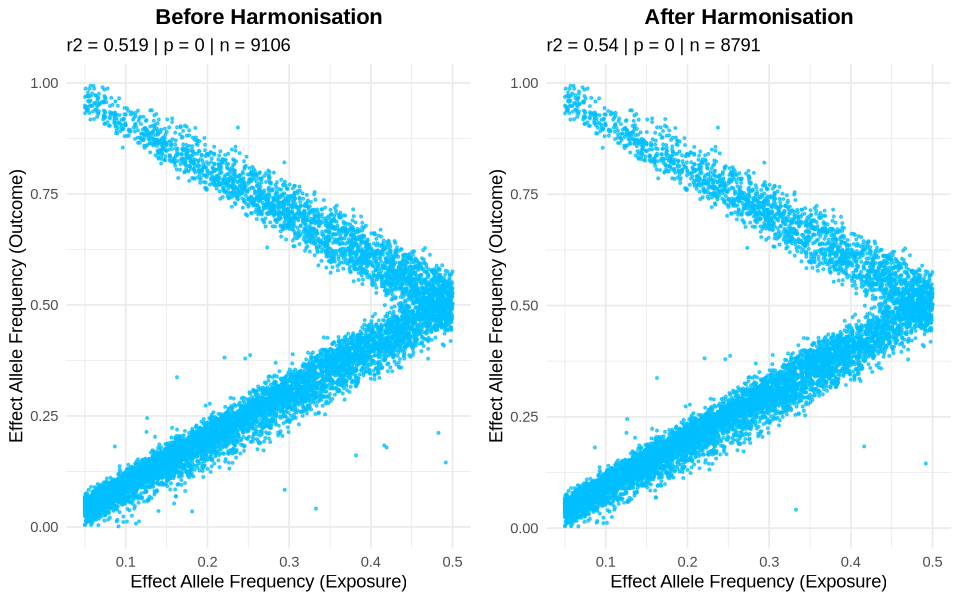

In [17]:
blood_exp_dat <- read_tsv("../../analysis/blood/blood_grn_ld_clumped_df.txt", show_col_types = F)
blood_out_dat <- read_tsv("../data/blood/outcome_df.txt", show_col_types = F)
harm_dat <- read_tsv("../data/blood/harmonised_eo_df.txt", show_col_types = F)

blood_before_har <- inner_join(blood_exp_dat %>%  
                         filter(mr_keep.exposure == TRUE) %>% 
                         dplyr::select(SNP, eaf.exposure) %>%
                         distinct(), 
                        blood_out_dat %>% 
                         filter(mr_keep.outcome == TRUE) %>% 
                         dplyr::select(SNP, eaf.outcome) %>% 
                         distinct(),
                        by = "SNP")
blood_after_har <- harm_dat %>% 
    dplyr::select(SNP, eaf.exposure, eaf.outcome) %>% 
    distinct()

# Compute correlation coefficients
cor_before <- cor.test(blood_before_har$eaf.exposure, blood_before_har$eaf.outcome, method = "pearson")
cor_after <- cor.test(blood_after_har$eaf.exposure, blood_after_har$eaf.outcome, method = "pearson")

print(paste("Correlation before harmonization: r =", round(cor_before$estimate, 3)))
print(paste("Correlation after harmonization: r =", round(cor_after$estimate, 3)))

plot_correlation <- function(data, cor_result, title) {
  ggplot(data, aes(x = eaf.exposure, y = eaf.outcome)) +
    geom_point(color = "deepskyblue", alpha = 0.7, size = 0.5) +  # Scatter plot points
    labs(
      title = title,
      subtitle = paste("r2 =", round(cor_result$estimate, 3), "| p =", signif(cor_result$p.value, 3), "| n =", unique(length(data$SNP))),
      x = "Effect Allele Frequency (Exposure)",
      y = "Effect Allele Frequency (Outcome)"
    ) +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5, face = "bold"))
}

# Generate and display plots
p1 <- plot_correlation(blood_before_har, cor_before, "Before Harmonisation")
p2 <- plot_correlation(blood_after_har, cor_after, "After Harmonisation")

# Display plots side by side
# pdf("../plots/harmonisation_qc/blood_before_after_harmonisation_pearson.pdf", width = 8, height = 5)
options(repr.plot.width = 8, repr.plot.height = 5)
library(gridExtra)
grid.arrange(p1, p2, ncol = 2)
# dev.off()

range(blood_exp_dat$eaf.exposure)
range(blood_out_dat$eaf.outcome)

### lung (full dataset)

[1] "Correlation before harmonization: r = 0.513"
[1] "Correlation after harmonization: r = 0.542"


[1] 0.0502092 0.5000000

[1] 0.0041 0.9882

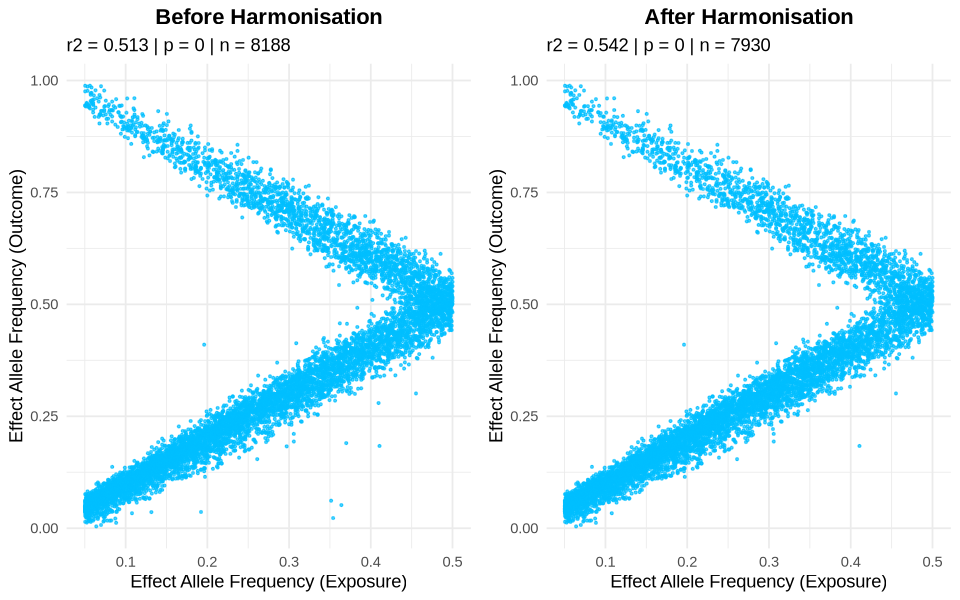

In [18]:
lung_exp_dat <- read_tsv("../../analysis/lung/lung_grn_ld_clumped.txt", show_col_types = F)
lung_out_dat <- read_tsv("../data/lung/outcome_df.txt", show_col_types = F)
harm_dat <- read_tsv("../data/lung/harmonised_eo_df.txt", show_col_types = F)

lung_before_har <- inner_join(lung_exp_dat %>%  
                         filter(mr_keep.exposure == TRUE) %>% 
                         dplyr::select(SNP, eaf.exposure) %>%
                         distinct(), 
                        lung_out_dat %>% 
                         filter(mr_keep.outcome == TRUE) %>% 
                         dplyr::select(SNP, eaf.outcome) %>% 
                         distinct(),
                        by = "SNP")
lung_after_har <- harm_dat %>% 
    dplyr::select(SNP, eaf.exposure, eaf.outcome) %>% 
    distinct()

# Compute correlation coefficients
cor_before <- cor.test(lung_before_har$eaf.exposure, lung_before_har$eaf.outcome, method = "pearson")
cor_after <- cor.test(lung_after_har$eaf.exposure, lung_after_har$eaf.outcome, method = "pearson")

print(paste("Correlation before harmonization: r =", round(cor_before$estimate, 3)))
print(paste("Correlation after harmonization: r =", round(cor_after$estimate, 3)))

plot_correlation <- function(data, cor_result, title) {
  ggplot(data, aes(x = eaf.exposure, y = eaf.outcome)) +
    geom_point(color = "deepskyblue", alpha = 0.7, size = 0.5) +  # Scatter plot points
    labs(
      title = title,
      subtitle = paste("r2 =", round(cor_result$estimate, 3), "| p =", signif(cor_result$p.value, 3), "| n =", unique(length(data$SNP))),
      x = "Effect Allele Frequency (Exposure)",
      y = "Effect Allele Frequency (Outcome)"
    ) +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5, face = "bold"))
}

# Generate and display plots
p1 <- plot_correlation(lung_before_har, cor_before, "Before Harmonisation")
p2 <- plot_correlation(lung_after_har, cor_after, "After Harmonisation")

# Display plots side by side
# pdf("../plots/harmonisation_qc/lung_before_after_harmonisation_pearson.pdf", width = 8, height = 5)
options(repr.plot.width = 8, repr.plot.height = 5)
library(gridExtra)
grid.arrange(p1, p2, ncol = 2)
# dev.off()

range(lung_exp_dat$eaf.exposure)
range(lung_out_dat$eaf.outcome)

### liver (full dataset)

[1] "Correlation before harmonization: r = 0.445"
[1] "Correlation after harmonization: r = 0.478"


[1] 0.1009615 0.5000000

[1] 0.0277 0.9730

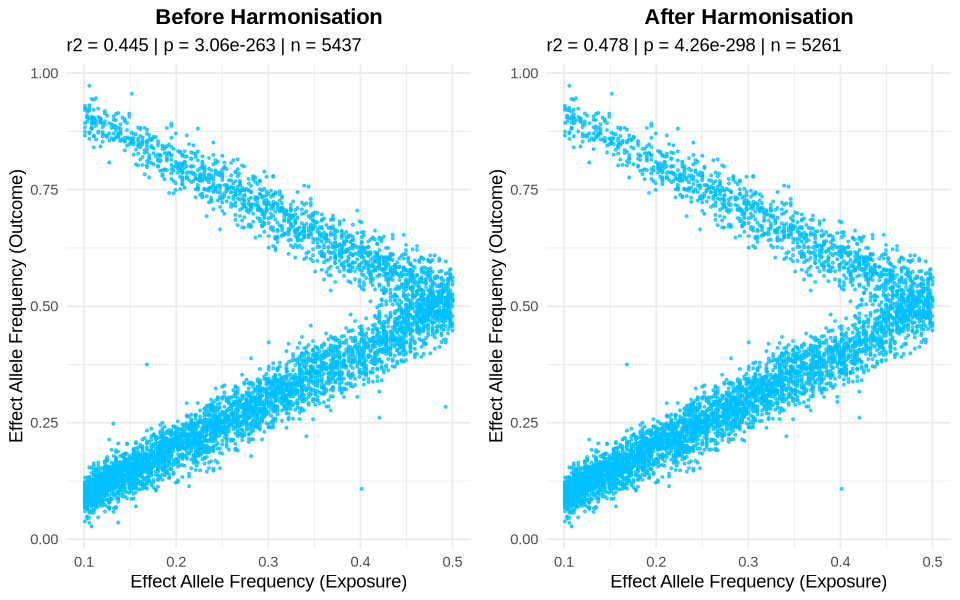

In [19]:
liver_exp_dat <- read_tsv("../../analysis/liver/liver_grn_ld_clumped.txt", show_col_types = F)
liver_out_dat <- read_tsv("../data/liver/outcome_df.txt", show_col_types = F)
harm_dat <- read_tsv("../data/liver/harmonised_eo_df.txt", show_col_types = F)

liver_before_har <- inner_join(liver_exp_dat %>%  
                         filter(mr_keep.exposure == TRUE) %>% 
                         dplyr::select(SNP, eaf.exposure) %>%
                         distinct(), 
                        liver_out_dat %>% 
                         filter(mr_keep.outcome == TRUE) %>% 
                         dplyr::select(SNP, eaf.outcome) %>% 
                         distinct(),
                        by = "SNP")
liver_after_har <- harm_dat %>% 
    dplyr::select(SNP, eaf.exposure, eaf.outcome) %>% 
    distinct()

# Compute correlation coefficients
cor_before <- cor.test(liver_before_har$eaf.exposure, liver_before_har$eaf.outcome, method = "pearson")
cor_after <- cor.test(liver_after_har$eaf.exposure, liver_after_har$eaf.outcome, method = "pearson")

print(paste("Correlation before harmonization: r =", round(cor_before$estimate, 3)))
print(paste("Correlation after harmonization: r =", round(cor_after$estimate, 3)))

plot_correlation <- function(data, cor_result, title) {
  ggplot(data, aes(x = eaf.exposure, y = eaf.outcome)) +
    geom_point(color = "deepskyblue", alpha = 0.7, size = 0.5) +  # Scatter plot points
    labs(
      title = title,
      subtitle = paste("r2 =", round(cor_result$estimate, 3), "| p =", signif(cor_result$p.value, 3), "| n =", unique(length(data$SNP))),
      x = "Effect Allele Frequency (Exposure)",
      y = "Effect Allele Frequency (Outcome)"
    ) +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5, face = "bold"))
}

# Generate and display plots
p1 <- plot_correlation(liver_before_har, cor_before, "Before Harmonisation")
p2 <- plot_correlation(liver_after_har, cor_after, "After Harmonisation")

# Display plots side by side
# pdf("../plots/harmonisation_qc/liver_before_after_harmonisation_pearson.pdf", width = 8, height = 5)
options(repr.plot.width = 8, repr.plot.height = 5)
library(gridExtra)
grid.arrange(p1, p2, ncol = 2)
# dev.off()

range(liver_exp_dat$eaf.exposure)
range(liver_out_dat$eaf.outcome)

### skin sun-exposed lower leg (full dataset)

[1] "Correlation before harmonization: r = 0.428"
[1] "Correlation after harmonization: r = 0.461"


[1] 0.1 0.5

[1] 0.0032 0.9865

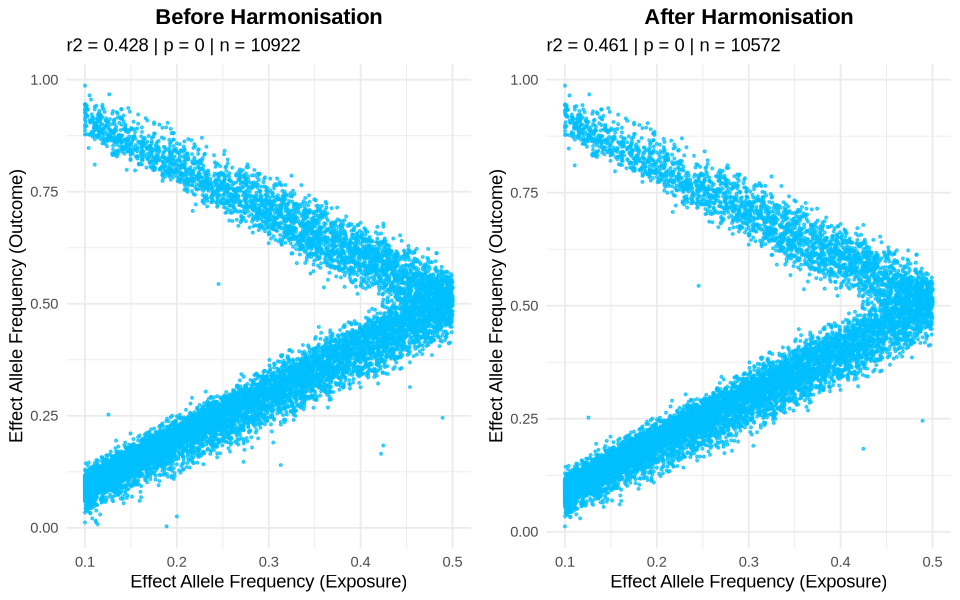

In [20]:
skin_leg_exp_dat <- read_tsv("../../analysis/skin_leg/skin_leg_grn_ld_clumped.txt", show_col_types = F)
skin_leg_out_dat <- read_tsv("../data/skin_leg/outcome_df.txt", show_col_types = F)
harm_dat <- read_tsv("../data/skin_leg/harmonised_eo_df.txt", show_col_types = F)

skin_leg_before_har <- inner_join(skin_leg_exp_dat %>%  
                         filter(mr_keep.exposure == TRUE) %>% 
                         dplyr::select(SNP, eaf.exposure) %>%
                         distinct(), 
                        skin_leg_out_dat %>% 
                         filter(mr_keep.outcome == TRUE) %>% 
                         dplyr::select(SNP, eaf.outcome) %>% 
                         distinct(),
                        by = "SNP")
skin_leg_after_har <- harm_dat %>% 
    dplyr::select(SNP, eaf.exposure, eaf.outcome) %>% 
    distinct()

# Compute correlation coefficients
cor_before <- cor.test(skin_leg_before_har$eaf.exposure, skin_leg_before_har$eaf.outcome, method = "pearson")
cor_after <- cor.test(skin_leg_after_har$eaf.exposure, skin_leg_after_har$eaf.outcome, method = "pearson")

print(paste("Correlation before harmonization: r =", round(cor_before$estimate, 3)))
print(paste("Correlation after harmonization: r =", round(cor_after$estimate, 3)))

plot_correlation <- function(data, cor_result, title) {
  ggplot(data, aes(x = eaf.exposure, y = eaf.outcome)) +
    geom_point(color = "deepskyblue", alpha = 0.7, size = 0.5) +  # Scatter plot points
    labs(
      title = title,
      subtitle = paste("r2 =", round(cor_result$estimate, 3), "| p =", signif(cor_result$p.value, 3), "| n =", unique(length(data$SNP))),
      x = "Effect Allele Frequency (Exposure)",
      y = "Effect Allele Frequency (Outcome)"
    ) +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5, face = "bold"))
}

# Generate and display plots
p1 <- plot_correlation(skin_leg_before_har, cor_before, "Before Harmonisation")
p2 <- plot_correlation(skin_leg_after_har, cor_after, "After Harmonisation")

# Display plots side by side
# pdf("../plots/harmonisation_qc/skin_leg_before_after_harmonisation_pearson.pdf", width = 8, height = 5)
options(repr.plot.width = 8, repr.plot.height = 5)
library(gridExtra)
grid.arrange(p1, p2, ncol = 2)
# dev.off()

range(skin_leg_exp_dat$eaf.exposure)
range(skin_leg_out_dat$eaf.outcome)

### skin not sun-exposed suprapubic (full dataset)

[1] "Correlation before harmonization: r = 0.431"
[1] "Correlation after harmonization: r = 0.463"


[1] 0.1005803 0.5000000

[1] 0.0078 0.9743

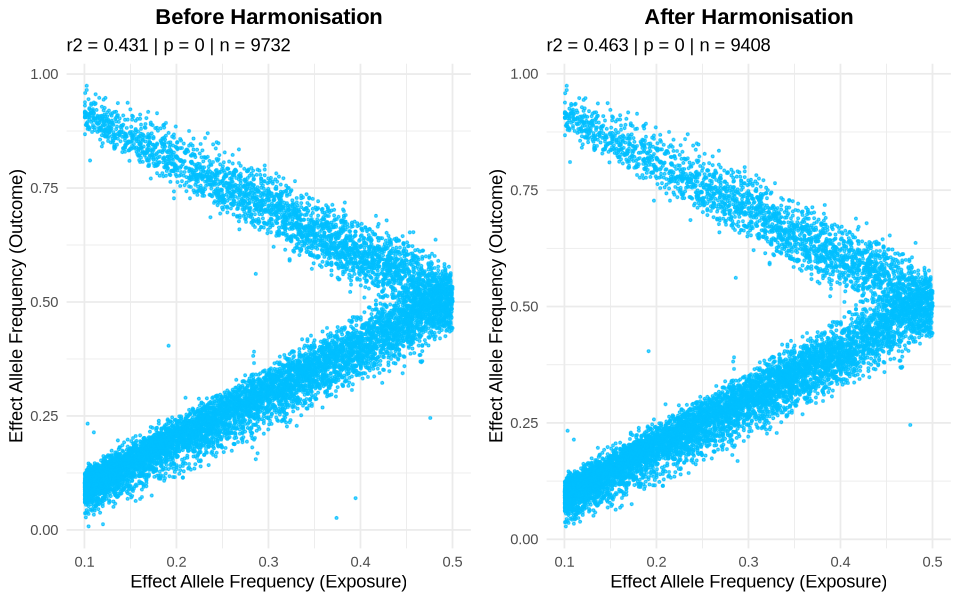

In [21]:
skin_pubic_exp_dat <- read_tsv("../../analysis/skin_pubic/skin_pubic_grn_ld_clumped.txt", show_col_types = F)
skin_pubic_out_dat <- read_tsv("../data/skin_pubic/outcome_df.txt", show_col_types = F)
harm_dat <- read_tsv("../data/skin_pubic/harmonised_eo_df.txt", show_col_types = F)

skin_pubic_before_har <- inner_join(skin_pubic_exp_dat %>%  
                         filter(mr_keep.exposure == TRUE) %>% 
                         dplyr::select(SNP, eaf.exposure) %>%
                         distinct(), 
                        skin_pubic_out_dat %>% 
                         filter(mr_keep.outcome == TRUE) %>% 
                         dplyr::select(SNP, eaf.outcome) %>% 
                         distinct(),
                        by = "SNP")
skin_pubic_after_har <- harm_dat %>% 
    dplyr::select(SNP, eaf.exposure, eaf.outcome) %>% 
    distinct()

# Compute correlation coefficients
cor_before <- cor.test(skin_pubic_before_har$eaf.exposure, skin_pubic_before_har$eaf.outcome, method = "pearson")
cor_after <- cor.test(skin_pubic_after_har$eaf.exposure, skin_pubic_after_har$eaf.outcome, method = "pearson")

print(paste("Correlation before harmonization: r =", round(cor_before$estimate, 3)))
print(paste("Correlation after harmonization: r =", round(cor_after$estimate, 3)))

plot_correlation <- function(data, cor_result, title) {
  ggplot(data, aes(x = eaf.exposure, y = eaf.outcome)) +
    geom_point(color = "deepskyblue", alpha = 0.7, size = 0.5) +  # Scatter plot points
    labs(
      title = title,
      subtitle = paste("r2 =", round(cor_result$estimate, 3), "| p =", signif(cor_result$p.value, 3), "| n =", unique(length(data$SNP))),
      x = "Effect Allele Frequency (Exposure)",
      y = "Effect Allele Frequency (Outcome)"
    ) +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5, face = "bold"))
}

# Generate and display plots
p1 <- plot_correlation(skin_pubic_before_har, cor_before, "Before Harmonisation")
p2 <- plot_correlation(skin_pubic_after_har, cor_after, "After Harmonisation")

# Display plots side by side
# pdf("../plots/harmonisation_qc/skin_pubic_before_after_harmonisation_pearson.pdf", width = 8, height = 5)
options(repr.plot.width = 8, repr.plot.height = 5)
library(gridExtra)
grid.arrange(p1, p2, ncol = 2)
# dev.off()

range(skin_pubic_exp_dat$eaf.exposure)
range(skin_pubic_out_dat$eaf.outcome)